In [2]:
import os, pickle
import pandas as pd
import numpy as np
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

/data/anaconda3/envs/hanliu-tutorial/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_ds = ImageFolder('../data/bm/train')
valid_ds = ImageFolder('../data/bm/valid')
test_ds = ImageFolder('../data/bm/test')

In [4]:
p2i_train = pickle.load(open('../data/img2idx/bm_train.pkl', 'rb'))
p2i_valid = pickle.load(open('../data/img2idx/bm_valid.pkl', 'rb'))
p2i_test = pickle.load(open('../data/img2idx/bm_test.pkl', 'rb'))

In [10]:
y_train = np.array([y for _, y in train_ds])
y_valid = np.array([y for _, y in valid_ds])
y_test = np.array([y for _, y in test_ds])
ytvs = y_train, y_valid, y_test

In [7]:
df = pd.read_csv('../data/bm_triplets/ab1-3.results.csv', index_col=0).reset_index(drop=True)

In [14]:
df['ttt'] = df['trips_train'].apply(eval).apply(lambda row: np.array([list(map(lambda i: p2i_train[i], trip)) for trip in row]))
df['vtt'] = df['trips_validtt'].apply(eval).apply(lambda row: np.array([[p2i_valid[trip[0]], p2i_train[trip[1]], p2i_train[trip[2]]] for trip in row]))
df['stt'] = df['trips_testtt'].apply(eval).apply(lambda row: np.array([[p2i_test[trip[0]], p2i_train[trip[1]], p2i_train[trip[2]]] for trip in row]))

In [15]:
def get_apn(trips, ytvs, fold):
    yt, yv, ys = ytvs
    ya = yv if fold == 'validtt' or fold == 'vtt' else ys if fold == 'testtt' or fold == 'stt' else yt
    yp, yn = yt, yt
    a = np.take(ya, trips[:,0])
    p = np.take(yp, trips[:,1])
    n = np.take(yn, trips[:,2])
    return a, p, n

In [16]:
df['tapn'] = df['ttt'].apply(lambda x: get_apn(x, ytvs, fold='ttt'))

In [26]:
def get_ds(a, p, n):
    apn = (a == p) & (a == n)
    ap_n = (a == p) & (a != n)
    an_p = (a == n) & (a != p)
    a_pn = (a != p) & (p == n)
    # return ap_n.sum() / (ap_n | an_p).sum(), (ap_n | an_p).sum()
    return ap_n.sum() / (ap_n | an_p).sum()

<AxesSubplot:>

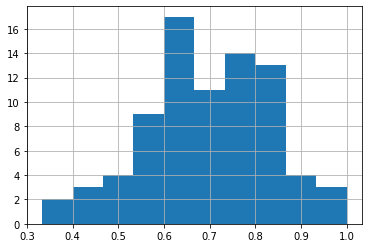

In [27]:
df['tapn'].apply(lambda r: get_ds(*r)).hist()